In [1]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Load Data

In [2]:
df = pd.read_csv("IMDB_Dataset.csv")

## UNDERSTAND DATA

In [3]:
#returns (number of rows, number of columns)
df.shape 

(50000, 2)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# Describes the complete sentiment feature
df['sentiment'].describe()

count        50000
unique           2
top       positive
freq         25000
Name: sentiment, dtype: object

In [6]:
# Describes the complete review feature
df['review'].describe()

count                                                 50000
unique                                                49582
top       Loved today's show!!! It was a variety and not...
freq                                                      5
Name: review, dtype: object

In [7]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

## PREPROCESS DATA

In [8]:
# This function removes html content, brackets, slash, special characters and other available noise in the data
def remove_noise(text, remove_digits=True):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = re.sub('\[[^]]*\]', '', text)
    text = re.sub(r'[^a-zA-z0-9\s]','',text)
    return text

In [9]:
df['review']=df['review'].apply(remove_noise)

In [10]:
df['review'][1]

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [11]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [12]:
'''This function applies the concept of lemmatization to the textual data. 
Lemmatization usually refers to the usage of a vocabulary and morphological analysis of words, normally aiming to remove
inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.'''
def lemmatize(text):
    lemmatizer = WordNetLemmatizer() 
    text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [13]:
df['review']=df['review'].apply(lemmatize)

In [14]:
df['review'][1]

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and give a comforting and sometimes discomforting sense of realism to the entire piece The actor are extremely well chosen Michael Sheen not only ha got all the polari but he ha all the voice down pat too You can truly see the seamless editing guided by the reference to Williams diary entry not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great master of comedy and his life The realism really come home with the little thing the fantasy of the guard which rather than use the traditional dream technique remains solid then disappears It play on our knowledge and our sens particularly with the scene concerning Orton and Halliwell and the set particularly of their flat with Halliwells mural decorating every surface are terribly well done'

In [15]:
df.head()

,review,sentiment
0,One of the other reviewer ha mentioned that af...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this wa a wonderful way to spend tim...,positive
3,Basically there a family where a little boy Ja...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [16]:
tokenizer=ToktokTokenizer()
stopwordsList=nltk.corpus.stopwords.words('english')

In [17]:
stop=set(stopwords.words('english'))

'''This function removes stopwords from the textual data. In english, words like ‘the’, ‘is’, ‘are’ etc. which might 
not be of use during training the model, are called stopwords and hence should be removed. '''

def stopword_removal(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwordsList]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwordsList]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [18]:
df['review']=df['review'].apply(stopword_removal)

In [19]:
df['review'][1]

'wonderful little production filming technique unassuming oldtimeBBC fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen Michael Sheen ha got polari ha voice pat truly see seamless editing guided reference Williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning Orton Halliwell set particularly flat Halliwells mural decorating every surface terribly well done'

In [20]:
df.head()

,review,sentiment
0,One reviewer ha mentioned watching 1 Oz episod...,positive
1,wonderful little production filming technique ...,positive
2,thought wa wonderful way spend time hot summer...,positive
3,Basically family little boy Jake think zombie ...,negative
4,Petter Matteis Love Time Money visually stunni...,positive


In [22]:
train_reviews=df.review[:40000]
train_reviews[1]

'wonderful little production filming technique unassuming oldtimeBBC fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen Michael Sheen ha got polari ha voice pat truly see seamless editing guided reference Williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning Orton Halliwell set particularly flat Halliwells mural decorating every surface terribly well done'

In [23]:
test_reviews=df.review[40000:]
test_reviews[45005]

'read review watching piece cinematic garbage took least 2 page find somebody else didnt think appallingly unfunny montage WASNT acme humour 70 indeed era isnt least funny set sketch comedy Ive ever seen itll till come along Half skit already done infinitely better act Monty Python Woody Allen wa say nice piece animation last 90 second highlight film would still get close summing mindless drivelridden waste 75 minute Seminal comedy world seminal really mean semen Scatological humour world scat actually feces Precursor joke mean handbook comedy Tits bum odd beaver Niceif pubescent boy least one hand free havent found Playboy exists Give break wa early 70 way sketch comedy going back least ten year prior way could even forgive film even made wa gunpoint Retro Hardly Sketches clown subtly perverting child may cutting edge circle could actually funny come really quite sad kept going throughout entire 75 minute Sheer belief may saved genuinely funny skit end gave film 1 wa lower scoreand re

In [24]:
'''TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document 
but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency 
weightings, and allow you to encode new documents'''

tvector=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tvector_train_reviews=tvector.fit_transform(train_reviews)
tvector_test_reviews=tvector.transform(test_reviews)

print('Tfidf_train_reviews:',tvector_train_reviews.shape)
print('Tfidf_test_reviews:',tvector_test_reviews.shape)

Tfidf_train_reviews: (40000, 6504016)
Tfidf_test_reviews: (10000, 6504016)


In [25]:
'''Binarize labels in a one-vs-all fashion i.e. converts target into binary form.'''
label=LabelBinarizer()

sentiment_df=label.fit_transform(df['sentiment'])
sentiment_df.shape

(50000, 1)

In [26]:
train_sentiments=sentiment_df[:40000]
test_sentiments=sentiment_df[40000:]

## TRAIN MODEL

In [27]:
model=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

model_tfidf=model.fit(tvector_train_reviews,train_sentiments)
model_tfidf

C:\Users\kajal.singh01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kajal.singh01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## PREDICT ON UNSEEN DATA

In [28]:
model_tfidf_predict=model.predict(tvector_test_reviews)
model_tfidf_predict

array([0, 0, 0, ..., 0, 0, 1])

## PERFORMANCE METRIC CALCULATION

In [30]:
model_score=accuracy_score(test_sentiments,model_tfidf_predict)
print("model accuracy score :",model_score)

model accuracy score : 0.7463


In [33]:
model_report=classification_report(test_sentiments,model_tfidf_predict,target_names=['Positive','Negative'])
print(model_report)

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.74      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [34]:
model_conf=confusion_matrix(test_sentiments,model_tfidf_predict,labels=[1,0])
print(model_conf)

[[3642 1365]
 [1172 3821]]


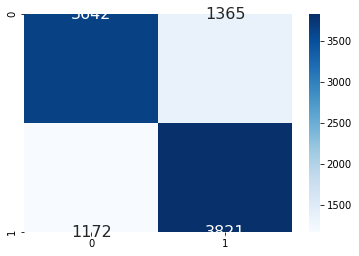

In [45]:
import seaborn as sns
sns.heatmap(model_conf, annot=True, cmap='Blues', fmt="d", annot_kws={'size':16})

In [46]:
from sklearn import model_selection, naive_bayes, svm

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tvector_train_reviews,train_sentiments)


C:\Users\kajal.singh01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tvector_test_reviews)

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_sentiments)*100)